In [1]:
import scipy as sp
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, widgets
from IPython.display import Audio, display
%matplotlib inline
%run vtoolbox
%load_ext autoreload
%autoreload 2

In this notebook we will investigate a phenomena that occurs when the driving frequency becomes close  to  the  system’s  natural  frequency. 

For zero initial conditions, the response is given by the equation:

\begin{equation}
x(t) = \frac{2f_0}{\omega^2_n - \omega^2} sin\Big(\frac{\omega_n - \omega}{2} t\Big) sin\Big(\frac{\omega_n + \omega}{2}t\Big)
\end{equation}

Since $(\omega_n - \omega)$ is small, $(\omega_n + \omega)$ is large in comparison and $sin[(\omega_n - \omega)/2]t$ oscillates with a longer period than $sin[(\omega_n + \omega)/2]t$. 
The result is a rapid oscillation with slowly varying amplitude that is called a $\textbf{beat}$.

The system defined in the function bellow has a a natural frequency $\omega_n = 1000 \ rad/s$. 

You can change the excitation frequency moving the slide 'wdr' and hear the resulting sound.

When you get close to the natural frequency you will be able to recognize the beats.

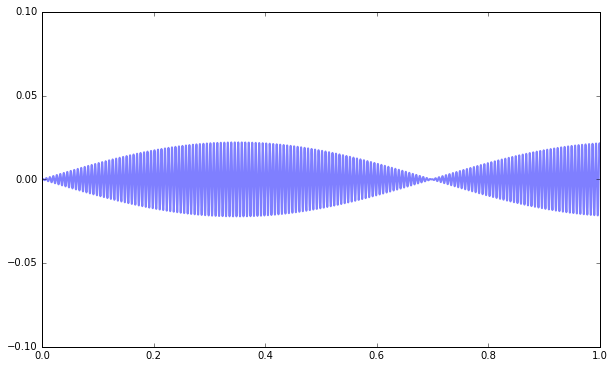

In [7]:
@interact(wdr=widgets.FloatSlider(min=900, max=1100, step=1, value=1100))
def f(wdr):
    t, a = forced_sdof_analytical(m=1, k=10**6, x0=0, v0=0, wdr=wdr, F0=200, tf=5)
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    ax1.plot(t, a, alpha=0.5)
    ax1.set_xlim([0, 1])
    ax1.set_ylim([-0.1, 0.1])
    display(Audio(data=a, rate=1/0.000125))